In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


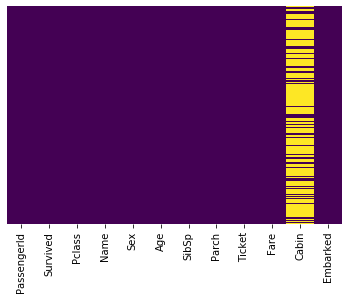

In [2]:
#Imputing average age values to nulls

def age_impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(age_impute,axis=1)

train.count()
train[train['Sex'].str.match("female")].count()

# sns.countplot(x='Survived', hue='Sex', data=train)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


#Being female meant a good chance of surviving

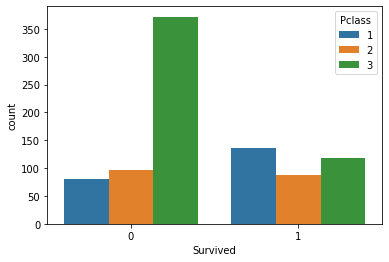

In [3]:
sns.countplot(x='Survived', hue='Pclass', data=train)

#Being 3rd class meant a bad chance of surviving

In [4]:
#Delete Cabin column because too much missing data

# train.drop("Cabin", inplace=True, axis=1)
train.dropna(inplace=True)

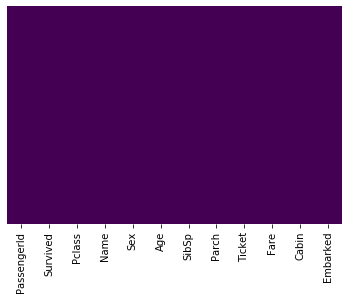

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#Dataset looks complete enough

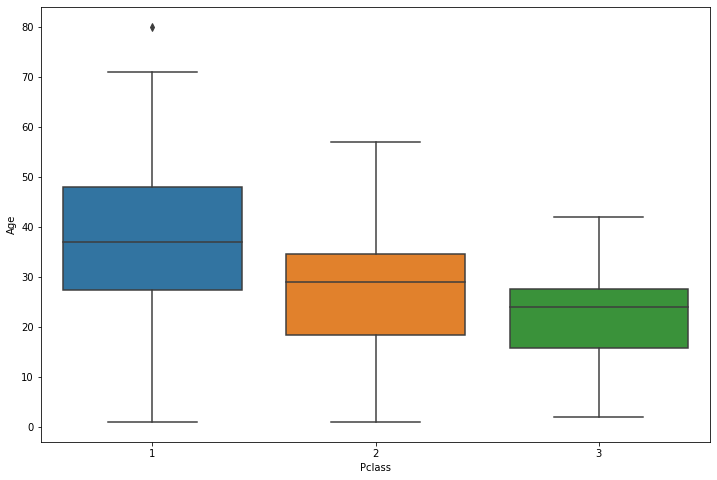

In [6]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y='Age', data=train)

In [7]:
#Converting Categorical Features

#Assuming we can delete the female feature because a 0 in male indicates that
sex = pd.get_dummies(train["Sex"], drop_first=True)

#Repeating for P Class and Embarked
embarked = pd.get_dummies(train["Embarked"], drop_first=True)
pclass = pd.get_dummies(train["Pclass"], drop_first=True)

In [8]:
train = pd.concat([train, pclass, sex, embarked], axis=1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,2,3,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,1,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,0,0,1


In [27]:
final_train = train.drop(["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Embarked", "Cabin"], axis=1)

In [43]:
x = final_train.drop("Survived", axis=1)
y = final_train["Survived"]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

X

,Age,SibSp,Parch,Fare,2,3,male,Q,S
1,38.0,1,0,71.2833,0,0,0,0,0
3,35.0,1,0,53.1000,0,0,0,0,1
6,54.0,0,0,51.8625,0,0,1,0,1
10,4.0,1,1,16.7000,0,1,0,0,1
11,58.0,0,0,26.5500,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
871,47.0,1,1,52.5542,0,0,0,0,1
872,33.0,0,0,5.0000,0,0,1,0,1
879,56.0,0,1,83.1583,0,0,0,0,0
887,19.0,0,0,30.0000,0,0,0,0,1


In [1]:
#Decision Boundary through sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
sigmoid(0)

def cost(theta, X, y):
    predictions = sigmoid(X @ theta)
    predictions[predictions == 1] = 0.999 #log(1) = 0 causes division error
    error = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions);
    return sum(error) / len(y);

In [2]:
#∂J(θ)/∂θj=1/m∑i=1m(hθ(x(i))−y(i))x(i)j

def cost_gradient(theta, X, y):
    predictions = sigmoid(X@theta);
    return X.transpose() @ (predictions - y) / len(y)
#@ is dot multiplication, X.transpose() is x(i)(j)

In [ ]:
#Add first column to x to account for intercept term theta0, always 1
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

In [44]:
from sklearn.metrics import classification_report
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63        20
           1       0.82      0.80      0.81        41

    accuracy                           0.75        61
   macro avg       0.72      0.73      0.72        61
weighted avg       0.76      0.75      0.76        61



In [41]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[13,  7],
       [ 8, 33]], dtype=int64)